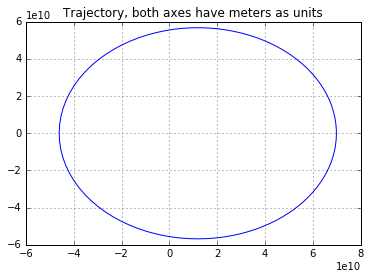

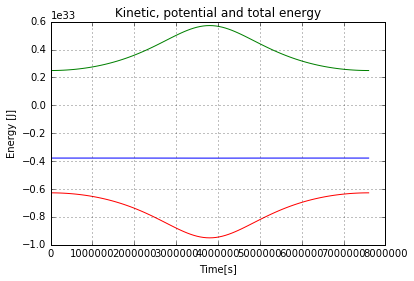

<function __main__.mercury>

In [1]:
from math import sqrt                     #Import the method sqrt from the library math in order to perform square roots
from matplotlib.pyplot import *           #Import the matplotlib libreary to draw plots
from ipywidgets import interact           #Import the method interact from the ipywidgets to make an interactive widget
#Show the plot inside the notebook
%matplotlib inline                           

def mercury(N = 101):                  #Define the function mercury with N, the number of iteration, as a parameter
    
    
    t = [0]                               #The array of times, Dt is a hundredth of a year on mercury expressed in seconds
    Dt = 76005.216
    
    G = 6.67408*10**-11                      #The gravitational constant expressed in m^3 kg^-1 s^-2
    M = 1988500*10**24                       #The mass of the sun M and mercury m as reported by NASA factsheet
    m = 0.33011*10**24
    
#To set initial condition we reffered to the NASA fact sheet, https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#The simulation starts with the plant in his aphelion.

    x = [69.82*10**9]                   #Initial position
    y = [0]
    
    vx = [0]                            #Initial velocity
    vy = [38.86*10**3]
    
    r = [sqrt(x[0]**2 + y[0]**2)]       #Initial distance from the sun, we need it to compute the acceleration
    v = [sqrt(vx[0]**2+vy[0]**2)]       #The module of the velocity, we need it to compute the kinetic energy
    
    K = [0.5 * m * v[0]**2]             #Initial kinetic, potential and total energy
    U = [-G * M * m /r[0]]
    E = [K[0]+U[0]]
    
    ax = [-G*M*x[0]/r[0]**3]           #Acceleration
    ay = [-G*M*y[0]/r[0]**3]
    
    
    #In the for cycle, a new element is appended to the arrays of position, velocity, acceleration and energy
    
    for i in range (1, N):           #Start the cycle, the true hart of the algorithm
        
        x.append(x[i-1] + vx[i-1] * Dt + 0.5 * ax[i-1] * Dt**2)
        y.append(y[i-1] + vy[i-1] * Dt + 0.5 * ay[i-1] * Dt**2)           #Compute positon at the i-th step

        r.append(sqrt(x[i]**2+y[i]**2))                                   #Compute distance from the sun at the i-th step

        ax.append(-G*M*x[i]/r[i]**3)                                      #Compute acceleration at the i-th step
        ay.append(-G*M*y[i]/r[i]**3)
        
        vx.append(vx[i-1] + 0.5 * (ax[i-1] + ax[i]) * Dt)
        vy.append(vy[i-1] + 0.5 * (ay[i-1] + ay[i]) * Dt)                 #Compute velocity at the i-th step
        
        v.append(sqrt(vx[i]**2+vy[i]**2))
        
        K.append(0.5 * m * v[i]**2)
        U.append(-G*M*m/r[i])                                   #Compute energy (divided bi the come mass) at the i-th step
        E.append(U[i] + K[i])
        
        t.append(t[i-1] + Dt)                                 #Advance time
        
        #Plot the relusts
    
    figure()                        #Plots the trajectory of the planets                                    
    plot(x, y)
    title("Trajectory, both axes have meters as units") 
    grid()

    
    figure()                       #Plots energy as a function of time
    plot(t, E)
    plot(t, K)
    plot(t, U)
    title("Kinetic, potential and total energy")
    xlabel("Time[s]")
    ylabel("Energy [J]")
    grid()

    show()
    
interact (mercury, N = (1,100000,1))    #The program is interactive so the trajectory can be followed step by step

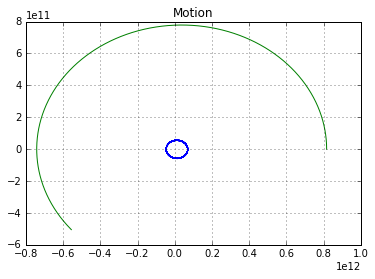

<function __main__.mercury>

In [4]:
from math import sqrt                    
from numpy import size
from matplotlib.pyplot import *           
from ipywidgets import interact           
%matplotlib inline                       

def mercury(N = 3000): 
    
    
    t = [0]                 
    Dt = 76005.216
    
    G = 6.67408*10**-11                      
    M = 1988500*10**24                  
    m = 0.33011*10**24
    J = 1898.19*10**24
    
#To set initial condition we reffered to the NASA fact sheet, 
#https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#The simulation starts with the plant in his aphelion.

    xm = [69.82*10**9]
    ym = [0]
    
    vxm = [0]
    vym = [38.86*10**3]
    
    xJ = [816.62*10**9] 
    yJ = [0]
    
    vxJ = [0]
    vyJ = [12.44*10**3]
    
    rm = [sqrt(xm[0]**2 + ym[0]**2)]
    
    rJm = [sqrt((xJ[0]-xm[0])**2+(yJ[0]-ym[0])**2)]
       
    rJ = [sqrt(xJ[0]**2 + yJ[0]**2)]
       
    axm = [-G*M*xm[0]/rm[0]**3 - G*J*(xm[0]-xJ[0])/(rJm[0]**3)]
    aym = [-G*M*ym[0]/rm[0]**3 - G*J*(ym[0]-yJ[0])/(rJm[0]**3)]
    
    axJ = [-G*M*xJ[0]/rJ[0]**3 - G*m*(xJ[0]-xm[0])/(rJm[0]**3)]
    ayJ = [-G*M*yJ[0]/rJ[0]**3 - G*m*(yJ[0]-ym[0])/(rJm[0]**3)]
    
    for i in range (1, N):
        
        xm.append(xm[i-1] + vxm[i-1] * Dt + 0.5 * axm[i-1] * Dt**2)
        ym.append(ym[i-1] + vym[i-1] * Dt + 0.5 * aym[i-1] * Dt**2) 

        rm.append(sqrt(xm[i]**2+ym[i]**2))
        
        xJ.append(xJ[i-1] + vxJ[i-1] * Dt + 0.5 * axJ[i-1] * Dt**2)
        yJ.append(yJ[i-1] + vyJ[i-1] * Dt + 0.5 * ayJ[i-1] * Dt**2) 

        rJ.append(sqrt(xJ[i]**2+yJ[i]**2))  
        
        rJm.append(sqrt((xJ[i]-xm[i])**2+(yJ[i]-ym[i])**2)) 

        axm.append(-G*M*xm[i]/rm[i]**3 - G*J*(xm[0]-xJ[0])/(rJm[0]**3))
        aym.append(-G*M*ym[i]/rm[i]**3 - G*J*(ym[0]-yJ[0])/(rJm[0]**3))
        
        axJ.append(-G*M*xJ[i]/rJ[i]**3 - G*m*(xm[0]-xJ[0])/(rJm[0]**3))
        ayJ.append(-G*M*yJ[i]/rJ[i]**3 - G*m*(ym[0]-yJ[0])/(rJm[0]**3))
        
        vxm.append(vxm[i-1] + 0.5 * (axm[i-1] + axm[i]) * Dt)
        vym.append(vym[i-1] + 0.5 * (aym[i-1] + aym[i]) * Dt)  
        
        vxJ.append(vxJ[i-1] + 0.5 * (axJ[i-1] + axJ[i]) * Dt)
        vyJ.append(vyJ[i-1] + 0.5 * (ayJ[i-1] + ayJ[i]) * Dt)   
        
        t.append(t[i-1] + Dt)
        
        
        #Plot the relusts
    
    figure()                                              
    plot(xm, ym)
    plot(xJ, yJ)
    title("Motion") 
    grid()
    show()
    
interact (mercury, N = (1,100000,1)) 

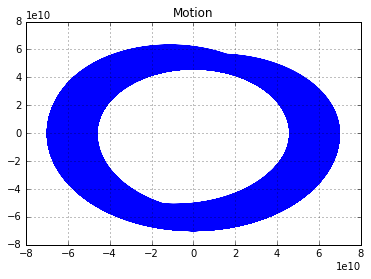

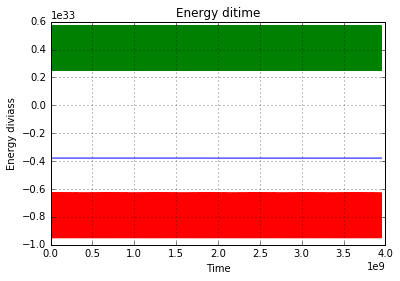

In [11]:
from math import sqrt,atan,pi                    #Import the method sqrt from the library math in order to perform square roots
from matplotlib.pyplot import *           #Import the matplotlib libreary to draw plots
from ipywidgets import interact
from scipy import stats              #Import the method interact from the ipywidgets to make an interactive widget
%matplotlib inline                       

def mercury_GR(N = 170):         #Define the function mercury time in seconds Dt = 1/10 of mercury year
    
    
    t = [0]                               #The array of times
    Dt = 76005.216
    
    G = 6.67408*10**-11                      #The gravitational constant expressed in m^3 kg^-1 s^-2
    M = 1988500*10**24                   #The mass of the sun M and mercury m as reported by NASA factsheet
    m = 0.33011*10**24
    
#To set initial condition we reffered to the NASA fact sheet, https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#The simulation starts with the plant in his aphelion.

    alpha = 10**21

    x = [69.82*10**9]
    y = [0]
    
    vx = [0]
    vy = [38.86*10**3]
    
    r = [sqrt(x[0]**2 + y[0]**2)]
    v = [sqrt(vx[0]**2+vy[0]**2)]
    
    K = [0.5 * m * v[0]**2]
    U = [-G * M * m /r[0]]
    E = [K[0]+U[0]]
    
    ax = [-G*M*x[0]/r[0]**3*(1+alpha/r[0]**3)]
    ay = [-G*M*y[0]/r[0]**3*(1+alpha/r[0]**3)]

    
    for i in range (1, N):
        
        x.append(x[i-1] + vx[i-1] * Dt + 0.5 * ax[i-1] * Dt**2)
        y.append(y[i-1] + vy[i-1] * Dt + 0.5 * ay[i-1] * Dt**2)           #Compute positon at the i-th step

        r.append(sqrt(x[i]**2+y[i]**2))                       #Compute distance from the sun

        ax.append(-G*M*x[i]/r[i]**3*(1+alpha/r[0]**3))
        ay.append(-G*M*y[i]/r[i]**3*(1+alpha/r[0]**3))
        
        vx.append(vx[i-1] + 0.5 * (ax[i-1] + ax[i]) * Dt)
        vy.append(vy[i-1] + 0.5 * (ay[i-1] + ay[i]) * Dt)               #Compute velocity at i-th step
        
        v.append(sqrt(vx[i]**2+vy[i]**2))
        
        K.append(0.5 * m * v[i]**2)
        U.append(-G*M*m/r[i])                                   #Compute energy (divided bi the come mass) at the i-th steè
        E.append(U[i] + K[i])
        
        t.append(t[i-1] + Dt)

        
        #Plot the relusts
    
    figure()                                              
    plot(x, y)
    title("Motion") 
    grid()

    
    figure()
    plot(t, E)
    plot(t, K)
    plot(t, U)
    title("Energy ditime")
    xlabel("Time")
    ylabel("Energy diviass")
    grid()

    show()
    
    
interact (mercury_GR, N = (1,100000,1)) 

In [9]:
0.0015122349153304628-181.2400214348153

-181.23850919989997

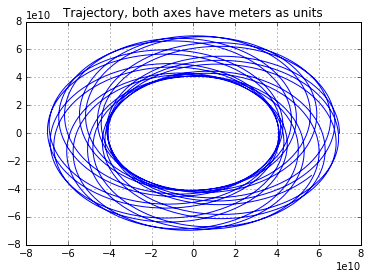

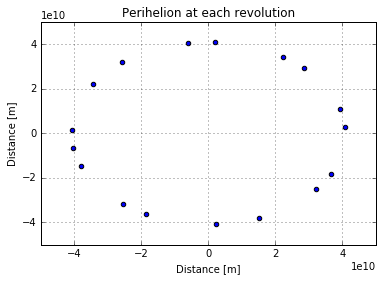

In [3]:
from math import sqrt,atan,pi                    #Import the method sqrt from the library math in order to perform square roots
from matplotlib.pyplot import *           #Import the matplotlib libreary to draw plots
from ipywidgets import interact
from scipy import stats              #Import the method interact from the ipywidgets to make an interactive widget
%matplotlib inline                       

def mercury_GR(N = 170):         #Define the function mercury time in seconds Dt = 1/10 of mercury year
    
    
    t = [0]                               #The array of times
    Dt = 76005.216
    
    G = 6.67408*10**-11                      #The gravitational constant expressed in m^3 kg^-1 s^-2
    M = 1988500*10**24                   #The mass of the sun M and mercury m as reported by NASA factsheet
    m = 0.33011*10**24
    
#To set initial condition we reffered to the NASA fact sheet, https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#The simulation starts with the plant in his aphelion.

    alpha = 10**31

    x = [69.82*10**9]
    y = [0]
    
    vx = [0]
    vy = [38.86*10**3]
    
    r = [sqrt(x[0]**2 + y[0]**2)]
    v = [sqrt(vx[0]**2 + vy[0]**2)]
    
    
    ax = [-G*M*x[0]/r[0]**3 - G*M*x[0]*alpha/(r[0]**6)]
    ay = [-G*M*y[0]/r[0]**3 -G *M*y[0]*alpha/(r[0]**6)]

    
    for i in range (1, N):
        
        x.append(x[i-1] + vx[i-1] * Dt + 0.5 * ax[i-1] * Dt**2)
        y.append(y[i-1] + vy[i-1] * Dt + 0.5 * ay[i-1] * Dt**2)           #Compute positon at the i-th step

        r.append(sqrt(x[i]**2+y[i]**2))                       #Compute distance from the sun

        ax.append(-G*M*x[i]/r[i]**3 - G*M*x[i]*alpha/(r[i]**6))
        ay.append(-G*M*y[i]/r[i]**3 - G *M*y[i]*alpha/(r[i]**6))
        
        vx.append(vx[i-1] + 0.5 * (ax[i-1] + ax[i]) * Dt)
        vy.append(vy[i-1] + 0.5 * (ay[i-1] + ay[i]) * Dt)               #Compute velocity at i-th step
        
        v.append(sqrt(vx[i]**2+vy[i]**2))
        
        t.append(t[i-1] + Dt)

        
        #Plot the relusts
    
    figure()                                              
    plot(x, y)
    title("Trajectory, both axes have meters as units") 
    grid()
    
    perihelion_x = []
    perihelion_y = []
    
    for i in range (1,N-1):
        if r[i] < r[i-1] and r[i] < r[i+1]:
            perihelion_x.append(x[i])
            perihelion_y.append(y[i])
    
    figure()
    scatter(perihelion_x, perihelion_y)
    title("Perihelion at each revolution")
    xlabel("Distance [m]")
    ylabel("Distance [m]")
    grid()
    
    show()
    
interact (mercury_GR, N = (1,100000,1)) 